QDR Quartile Date range

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('D:/Excel_files/Sample - Superstore2.xlsx')

In [4]:
df.shape

(9994, 21)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [7]:
df['Ship Date'].dtype

dtype('<M8[ns]')

In [8]:
df['Ship Date']

0      2020-11-11
1      2020-11-11
2      2020-06-16
3      2019-10-18
4      2019-10-18
          ...    
9989   2018-01-23
9990   2021-03-03
9991   2021-03-03
9992   2021-03-03
9993   2021-05-09
Name: Ship Date, Length: 9994, dtype: datetime64[ns]

In [9]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [11]:
df_date =  df.groupby([df['Order Date'].dt.quarter, 'Category']).agg({'Sales':sum})

In [12]:
df_date.unstack(-1)

Sales                            
Category      Furniture Office Supplies  Technology
Order Date                                         
1            98103.4378      110261.387  151316.751
2           142063.1776      143869.429  159577.013
3           200641.6477      207029.867  206260.591
4           301191.5322      257886.349  318999.678

In [13]:
df_any_one_year = df[df['Order Date'].dt.year == 2018]

In [14]:
df_any_one_year['Order Date'].dt.year.unique()

array([2018], dtype=int64)

In [59]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [58]:
df_any_one_year.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5,6,CA-2018-115812,2018-06-09,2018-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2018-115812,2018-06-09,2018-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2018-115812,2018-06-09,2018-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2018-115812,2018-06-09,2018-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2018-115812,2018-06-09,2018-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [15]:
df.shape

(9994, 21)

In [16]:
df_any_one_year.shape

(1993, 21)

In [17]:
sales_of_2018_with_quarters = df_any_one_year.groupby([df_any_one_year['Order Date'].dt.quarter, 'Category']).aggregate({'Sales':sum})

<AxesSubplot:title={'center':'Sales of all Quarter in 2018'}, xlabel='Category'>

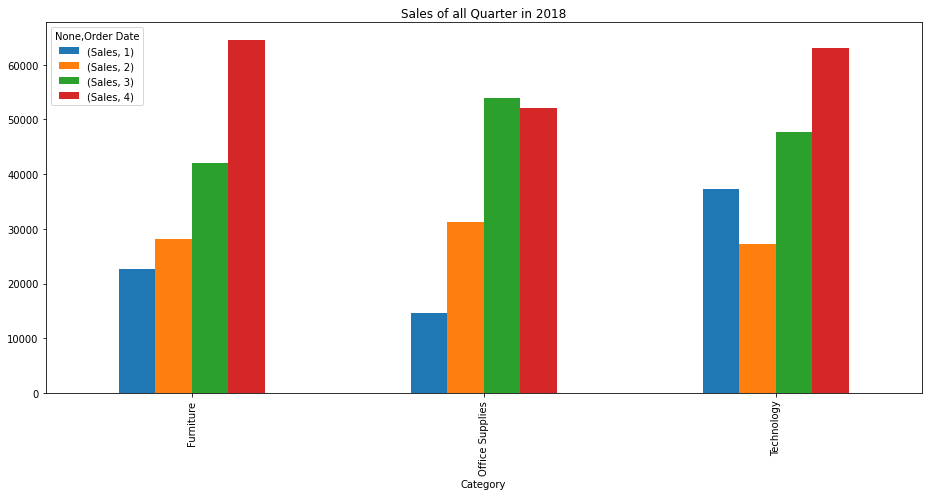

In [156]:
sales_of_2018_with_quarters.unstack(-2).plot(kind='bar',figsize=(13,7),title='Sales of all Quarter in 2018')

In [18]:
sales_all_years = df.groupby([df['Order Date'].dt.quarter, 'Category']).aggregate({'Sales':sum})

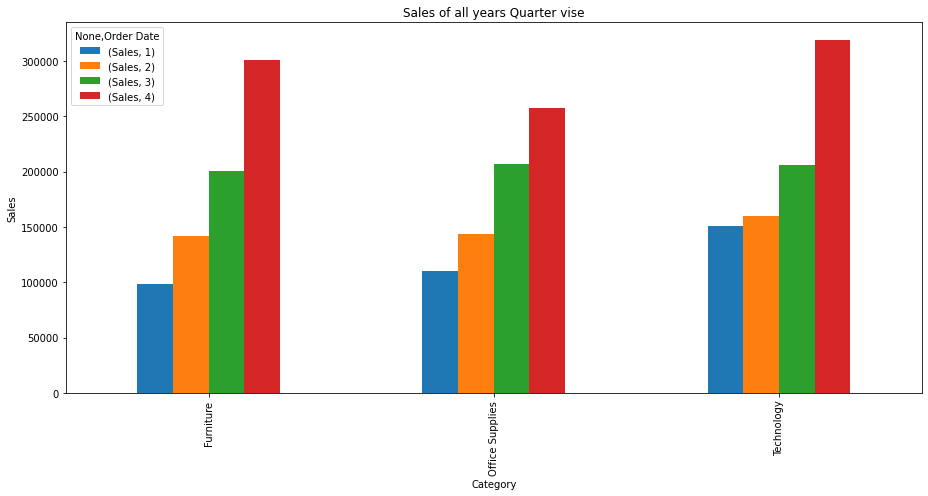

In [207]:

fig= sales_all_years.unstack(-2).plot(kind='bar',figsize=(13,7))


plt.title('Sales of all years Quarter vise')
plt.ylabel('Sales')

gca = plt.gca()

In [209]:
xfig = gca.get_figure()

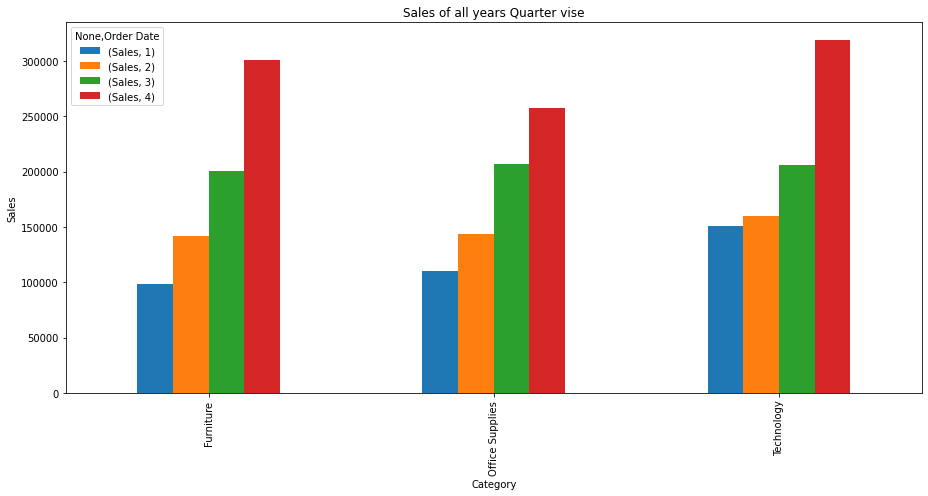

In [210]:
xfig

In [36]:
type(x)

matplotlib.axes._subplots.AxesSubplot

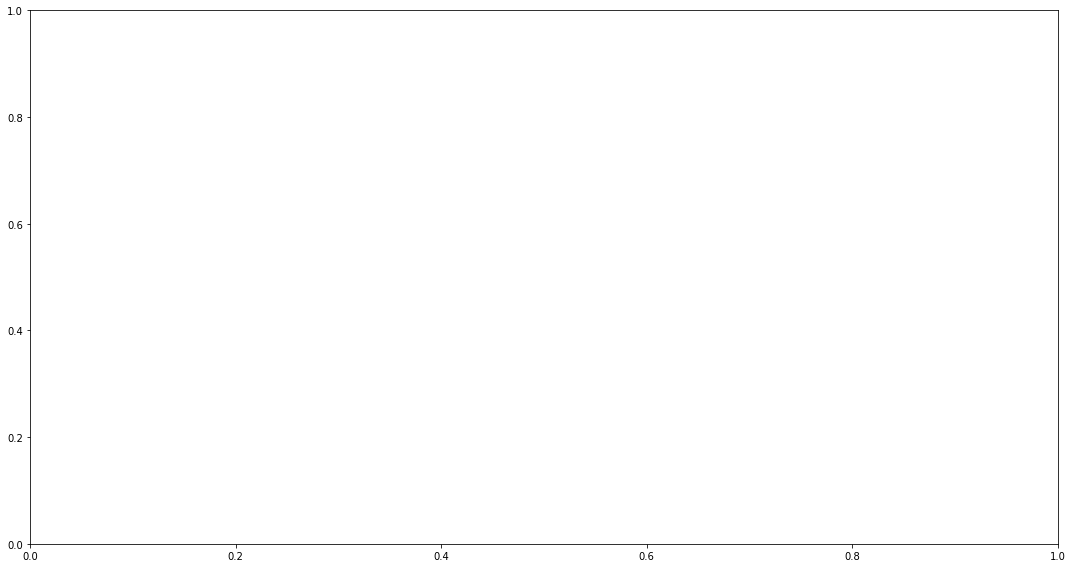

In [204]:
fig, ax = plt.subplots(figsize=(15,8))

In [205]:
type(fig)

matplotlib.figure.Figure

In [206]:
type(ax)


matplotlib.axes._subplots.AxesSubplot

In [195]:
gca

<AxesSubplot:title={'center':'Sales of all years Quarter vise'}, xlabel='Category', ylabel='Sales'>

In [178]:
plt.axes(x)

ValueError: The Axes must have been created in the present figure

<Figure size 432x288 with 0 Axes>

In [177]:
type(axis1)

matplotlib.axes._subplots.AxesSubplot

In [30]:
fig.draw_artist(x)


In [40]:
fig.add_subplot(x)

ValueError: The Subplot must have been created in the present figure

In [161]:
plot1.add_child_axes(x)

<AxesSubplot:title={'center':'Sales of all years Quarter vise'}, xlabel='Category'>

In [72]:
plot1.autoscale_view()

In [119]:
axis1.add_child_axes(x)

<AxesSubplot:title={'center':'Sales of all years Quarter vise'}, xlabel='Category'>

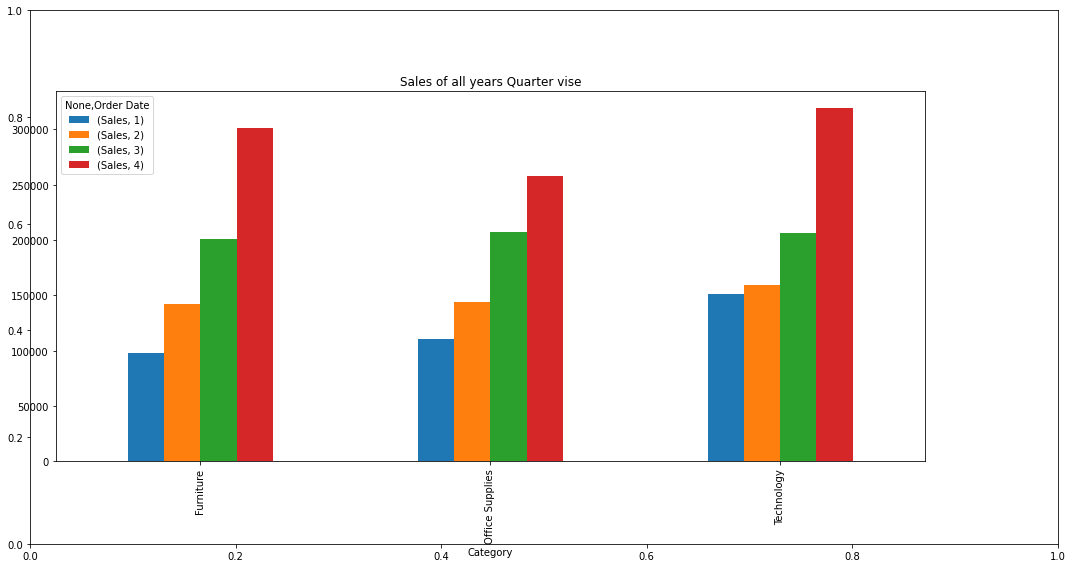

In [153]:
fig


In [148]:
plot1.add_child_axes(axis1)

<AxesSubplot:>

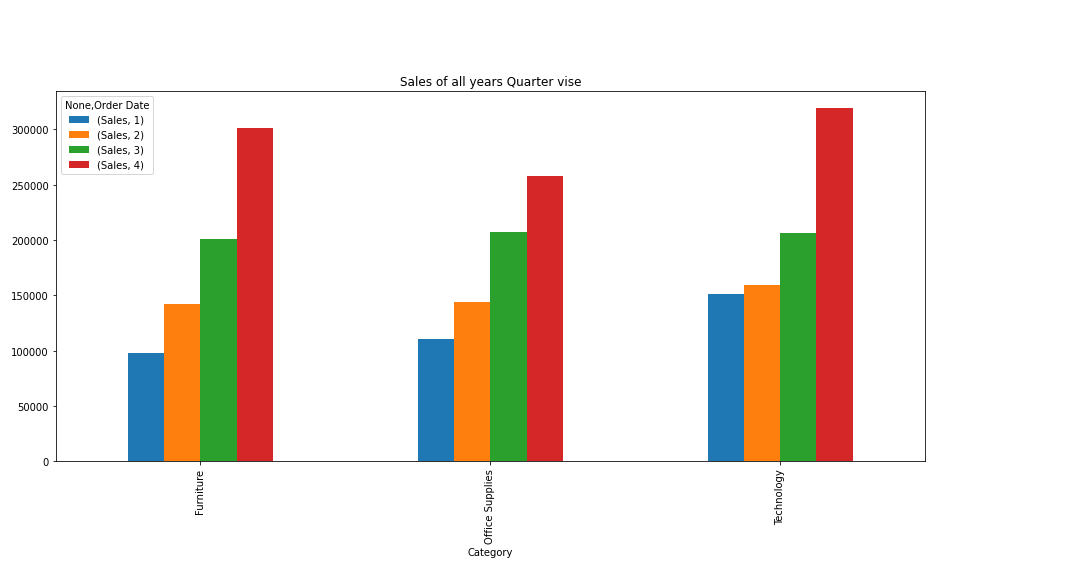

In [155]:

plot1.set_axis_off()
fig

In [124]:
fig.clear()

In [130]:
fig.add_subplot()

<AxesSubplot:>

In [134]:
fig.add_axes(plot1)

<AxesSubplot:>

In [136]:
plot1.spines['bottom'].set_visible(False)
plot1.spines['top'].set_visible(False)
plot1.spines['right'].set_visible(False)
plot1.spines['left'].set_visible(False)

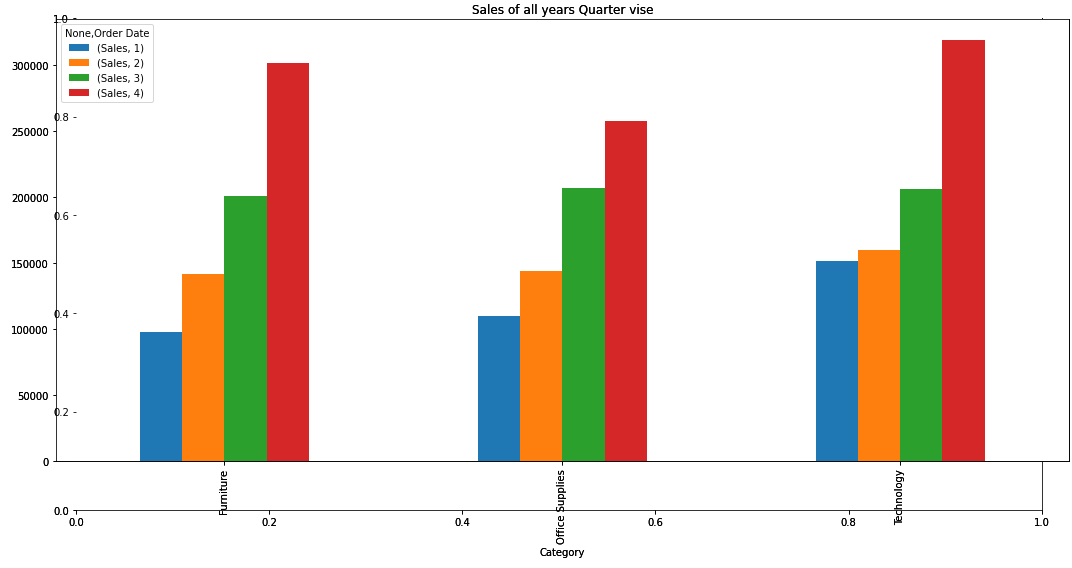

In [137]:
fig

In [96]:
fig.get_default_bbox_extra_artists()



[<AxesSubplot:>,

In [77]:
for i in fig.get_children():
    print(i)

Rectangle(xy=(0, 0), width=1, height=1, angle=0)
AxesSubplot(0.0447222,0.108464;0.945278x0.872786)


In [107]:

x.add_child_axes(plot1)

<AxesSubplot:>

In [109]:
x


<AxesSubplot:title={'center':'Sales of all years Quarter vise'}, xlabel='Category'>

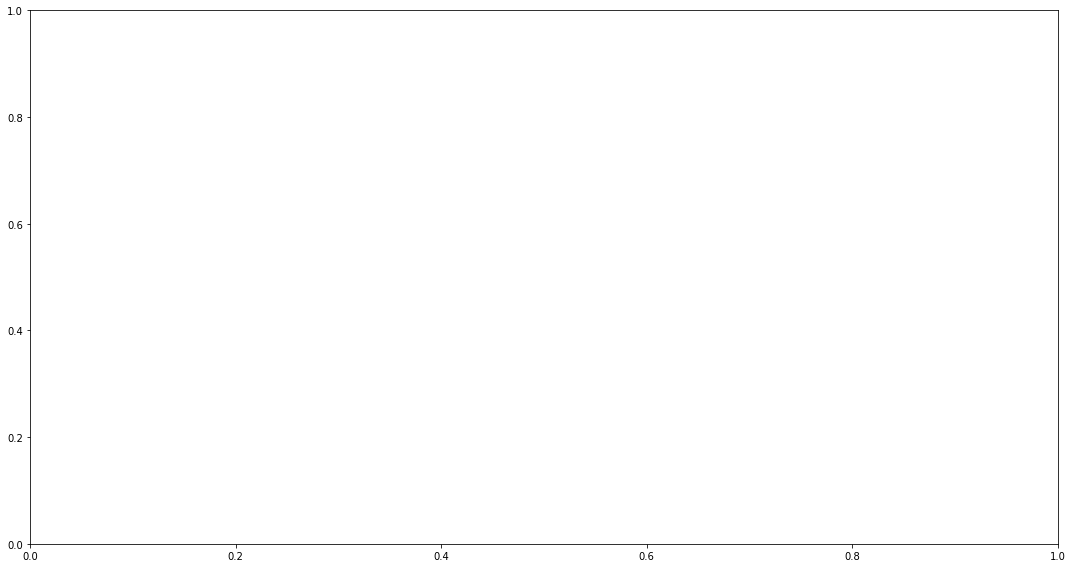

In [108]:
fig

In [172]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [171]:
plt.close()

In [38]:
sales_of_2018_with_quarters.unstack(-2)

Sales                                    
Order Date               1           2           3           4
Category                                                      
Furniture        22656.139  28063.7496  41957.8783  64515.0862
Office Supplies  14528.683  31243.7350  53923.9680  52080.0260
Technology       37262.974  27231.2750  47751.3660  63032.6180

<AxesSubplot:title={'center':'Sales of 2018 with Qaurters'}, xlabel='Order Date'>

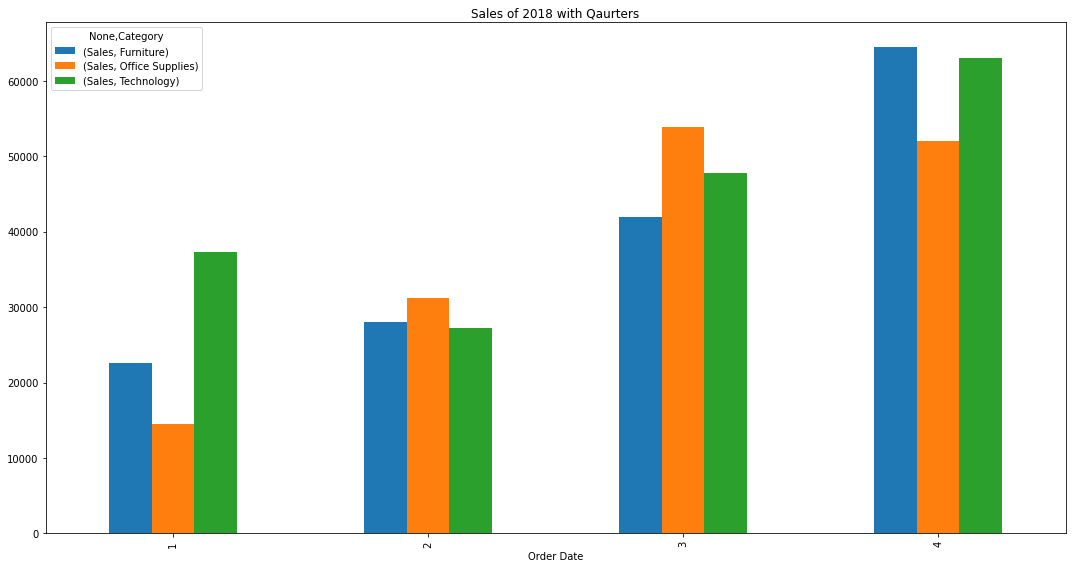

In [142]:

sales_of_2018_with_quarters.unstack(-1).plot(kind='bar',figsize=(15,8),title='Sales of 2018 with Qaurters')

In [43]:
df.shape

(9994, 21)

In [44]:
df_any_one_year.shape

(1993, 21)

In [85]:
# df_any_one_year.groups["Furnishings"]

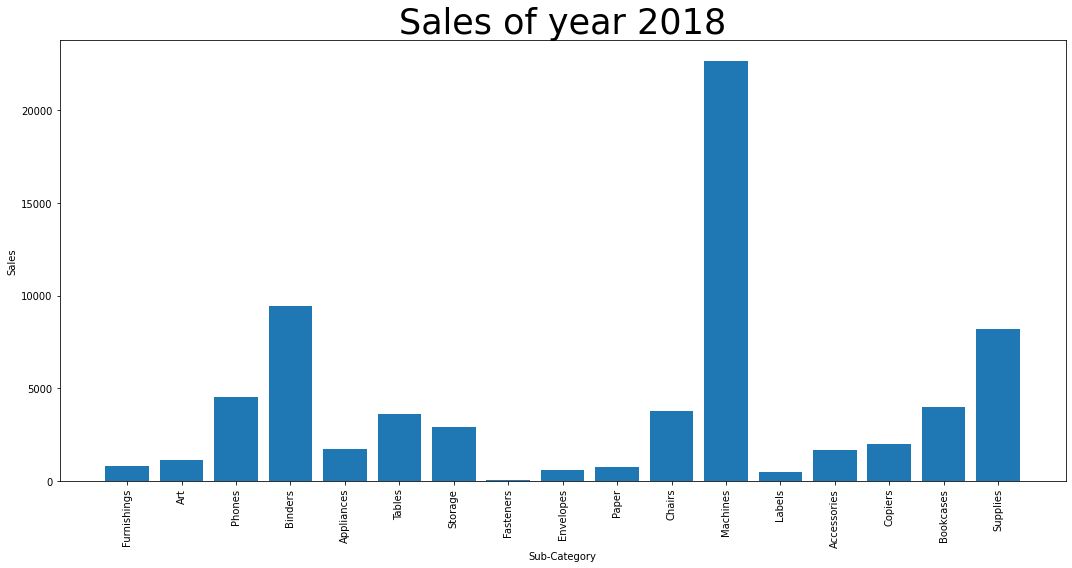

In [95]:
plt.figure(figsize=(15,8))
plt.bar('Sub-Category','Sales',data=df_any_one_year)
plt.rcParams.update({'font.family':'sans-serif'})
plt.title('Sales of year 2018', fontdict={'fontsize': 30})
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True


In [52]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

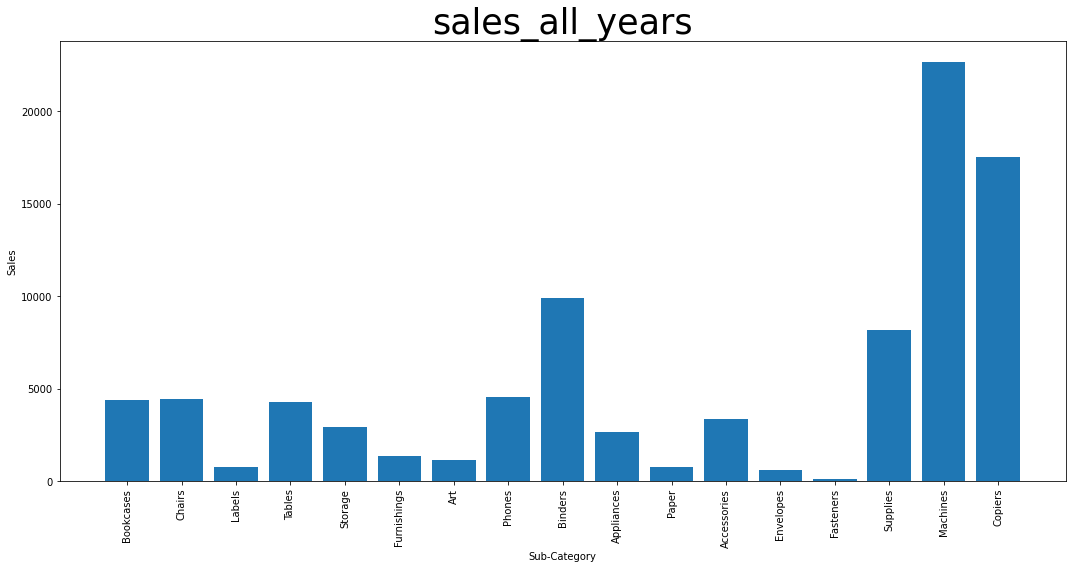

In [96]:
plt.figure(figsize=(15,8))
plt.bar('Sub-Category','Sales',data=df)
plt.title('sales_all_years', fontdict={'fontsize': 35})
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

In [76]:

df_any_one_year_one_quarter = df_any_one_year[ df_any_one_year['Order Date'].dt.quarter == 3]

In [77]:
df_any_one_year_one_quarter.shape

(564, 21)

In [78]:
df_any_one_year.shape

(1993, 21)

In [79]:
len(df_any_one_year['Sub-Category'].unique())

17

In [80]:
len(df_any_one_year_one_quarter['Sub-Category'].unique())

17

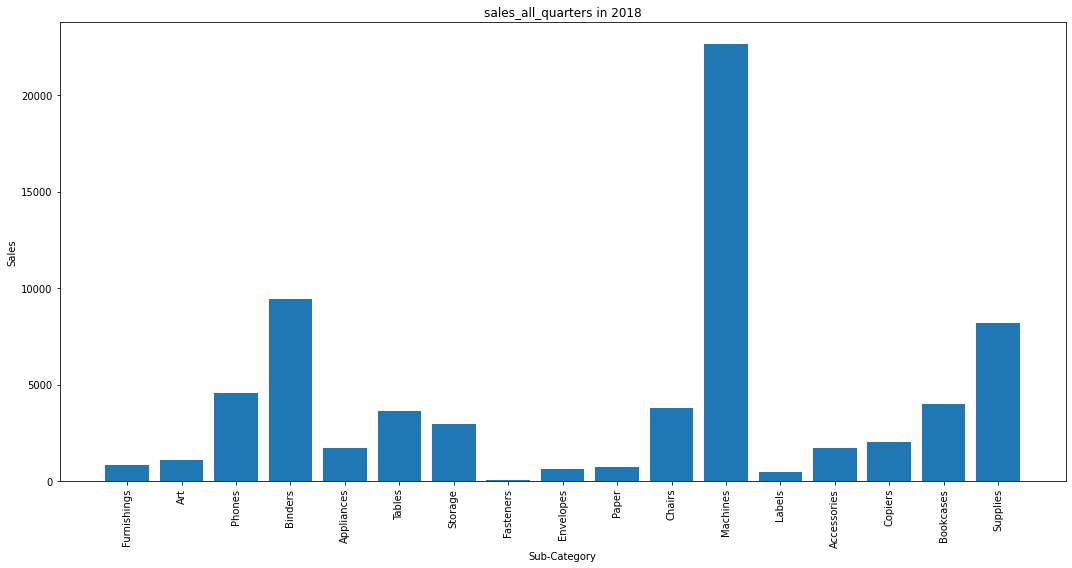

In [84]:
plt.figure(figsize=(15,8))
plt.bar('Sub-Category','Sales',data=df_any_one_year)
plt.title('sales_all_quarters in 2018', fontdict={'fontsize': 30})
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

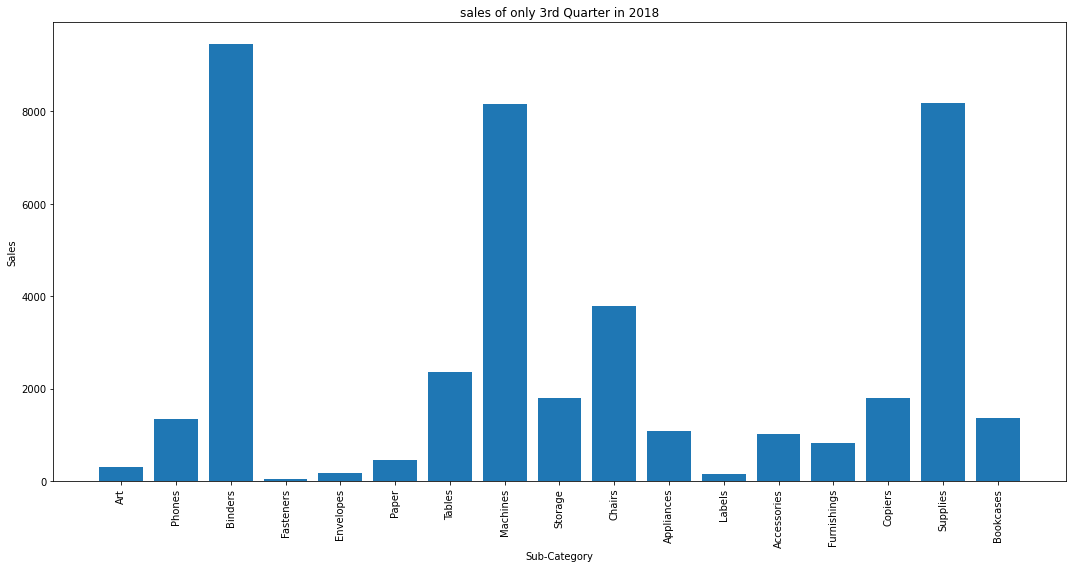

In [83]:
plt.figure(figsize=(15,8))
plt.bar('Sub-Category','Sales',data=df_any_one_year_one_quarter)
plt.title('sales of only 3rd Quarter in 2018', fontdict={'fontsize': 30})
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.rcParams["figure.autolayout"] = True

In [113]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [123]:
df_with_Technology = df[df['Category']=='Technology']

In [124]:
df_with_Technology['Category'].value_counts()

Technology    1847
Name: Category, dtype: int64

In [125]:
df[df['Category']=='Technology']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2018-115812,2018-06-09,2018-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2018-115812,2018-06-09,2018-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2018-143336,2018-08-27,2018-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2020-121755,2020-01-16,2020-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049.0,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2020-117590,2020-12-08,2020-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2020-157728,2020-09-22,2020-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505.0,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2020-125794,2020-09-29,2020-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008.0,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2021-163629,2021-11-17,2021-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605.0,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2021-163629,2021-11-17,2021-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605.0,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [141]:
df_no_furniture = df[(df[ df['Category']=='Technology'] )& (df[df['Category'] =='Office Supplies'])]

TypeError: unsupported operand type(s) for &: 'DatetimeArray' and 'DatetimeArray'

In [132]:
type(df_no_furniture)

tuple

In [135]:
len(df_no_furniture)

2

In [140]:
df_no_furniture[1]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2018-115812,2018-06-09,2018-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2018-115812,2018-06-09,2018-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2018-115812,2018-06-09,2018-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2020-157728,2020-09-22,2020-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505.0,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2019-100251,2019-05-17,2019-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561.0,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2019-100251,2019-05-17,2019-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561.0,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
